# Seaborn

Seaborn is built on top of Matplotlib and is designed for statistical data visualization. It makes it easier to create more attractive and informative statistical graphics with fewer lines of code.

- Strengths:
  - Simplifies the creation of complex plots.
  - Provides beautiful default styles and color palettes.
  - <span style="color: orange;">Integrated with Pandas, making it easy to work with DataFrames</span>. 
    - We can pass in the dataframe as an argument to the function, then for the `x` and `y` axis we simply need to provide the string values of the dataframe's columns. Example: `sns.catplot(data=tips, x='time', y='total_bill')`.
    - We can easily do aggregation inside Seaborn instead of having to use `groupby` and `agg`. Example: `sns.catplot(data=tips, x='time', y='total_bill', estimator='sum')`.
  - Legends and labels are automatically generated.

- Weaknesses:
  - Less flexible than Matplotlib for highly customized plots.
  - Limited to statistical plots (but it covers a wide range of them).

NOTE: Seaborn is more DataFrame-friendly. If the output is a Series, convert it to a DataFrame and make sure the index has been reset before passing it to Seaborn.

In [3]:
import seaborn as sns

# # Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")  # tips is actually a built-in dataset stored online in Seaborn's GitHub repo, to load my own dataset, use pandas
# tips = sns.load_dataset('../../pandas/files/chipotle.tsv')

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Theme

`sns.set_theme()` is used to set the visual theme for Seaborn plots. It sets the default aesthetics and visual appearance of plots, such as color palettes, fonts, and grid styles. By calling this function, you’re essentially customizing the look and feel of all subsequent Seaborn plots.

### Default Behavior

If you call sns.set_theme() without any arguments, Seaborn will apply its default theme settings. The default settings include:
- Context: 'notebook' — This adjusts the size of the labels and lines to be suitable for viewing in a Jupyter Notebook.
- Style: 'darkgrid' — This sets a dark grid background for the plots.
- Palette: 'deep' — This provides a set of colors for plotting that are designed to be distinct and visually appealing.
- Font: 'sans-serif'
- RC: The default Matplotlib rcParams (runtime configuration parameters) are used.

### Customize `sns.set_theme()`

You can customize the theme by passing specific parameters to sns.set_theme(). Some commonly used parameters include:
- context: Changes the scale of plot elements and can be one of 'paper', 'notebook', 'talk', or 'poster'.
- style: Changes the background style and can be one of 'white', 'dark', 'whitegrid', 'darkgrid', or 'ticks'.
- palette: Specifies a color palette. You can use a built-in palette or create a custom one.
- font: Specifies the font to use in the plots.
- rc: A dictionary of Matplotlib parameters to customize.

### Example Usage

<Axes: >

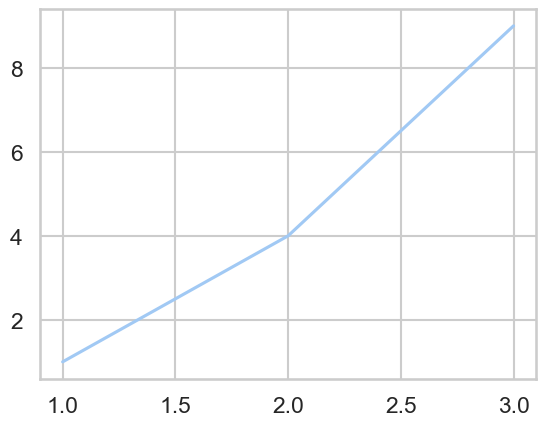

In [4]:
import seaborn as sns

# Set a custom theme
sns.set_theme(style='whitegrid', palette='pastel', context='talk')

# Now any plot created using Seaborn will have these theme settings
sns.lineplot(x=[1, 2, 3], y=[1, 4, 9])

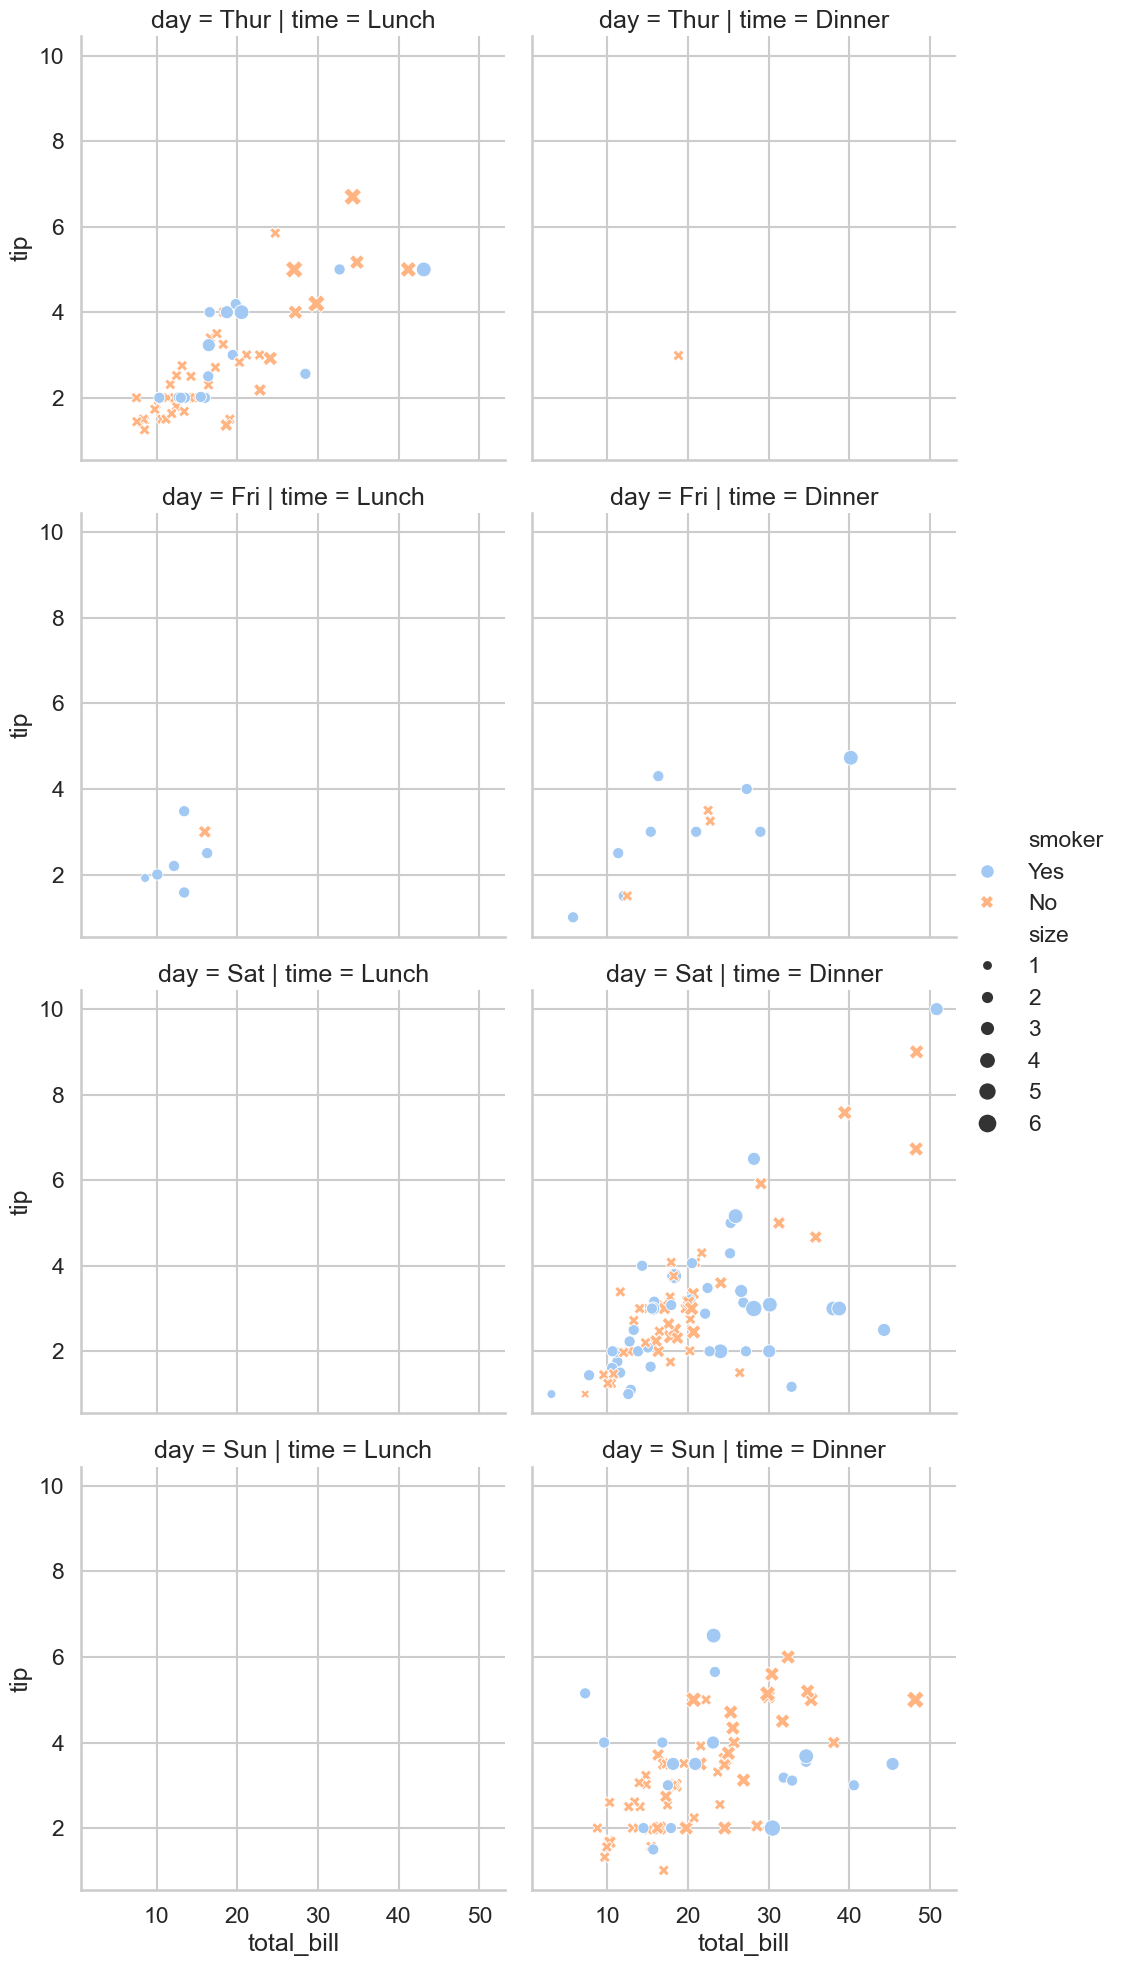

In [5]:
# Create a visualization 
sns.relplot(
    data=tips,
    x='total_bill', y='tip',
    col='time', row='day',
    hue='smoker', style='smoker', size='size'
)

## Three major chart types

- `relplot`: relationship plot, consisting of:
    - `scatterplot`: scatter plot
    - `lineplot`: line plot
- `displot`: distribution plot, consisting of:
    - `histplot`: histogram
    - `kdeplot`: kernel density estimate
    - `ecdfplot`: empirical cumulative distribution function
    - `rugplot`: rug plot
- `catplot`: categorical plot, consisting of:
    - `stripplot`: strip plot
    - `swarmplot`: swarm plot
    - `boxplot`: box plot
    - `violinplot`: violin plot
    - `pointplot`: point plot
    - `barplot`: bar plot

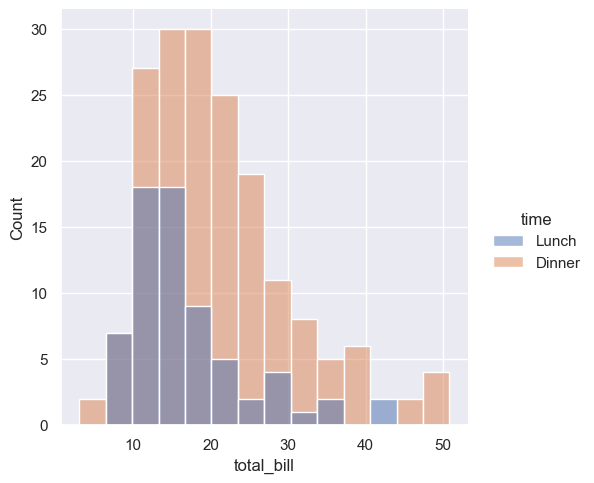

In [6]:
# use the default theme
sns.set_theme()

# displot - histogram
sns.displot(
    data=tips,
    x='total_bill',
    hue='time'
)

According to the histogram, it is easy to see that the total bills at lunch time between 10 and 20 are most frequent. Similarly, the total bill at dinner time between 15 and 25 get the most counts.

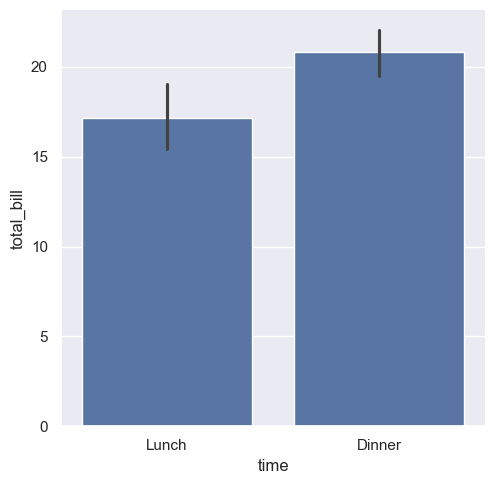

In [7]:
# catplot - barplot

sns.catplot(
    data=tips,
    x='time', y='total_bill',
    kind='bar'
)

We see that the number is pretty low, because it shows the `average` of `y` axis by those of `x` axis by default. 

To change the `y` axis to `sum`, use `estimator='sum'`:

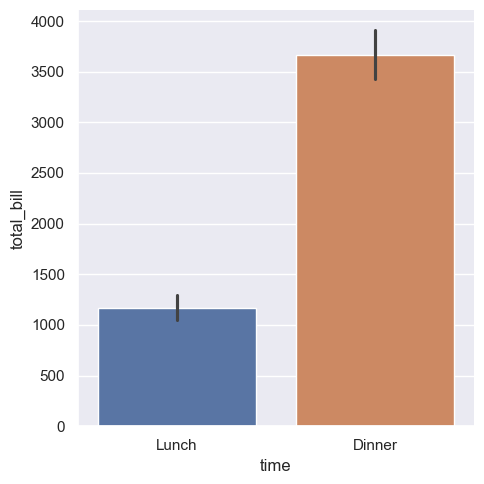

In [8]:
sns.catplot(
    data=tips,
    x='time', y='total_bill',
    hue='time',
    kind='bar',
    estimator='sum'
)

The little bars on top center of each bar is called `errorbar`. To get rid of them, set `errorbar=None`:

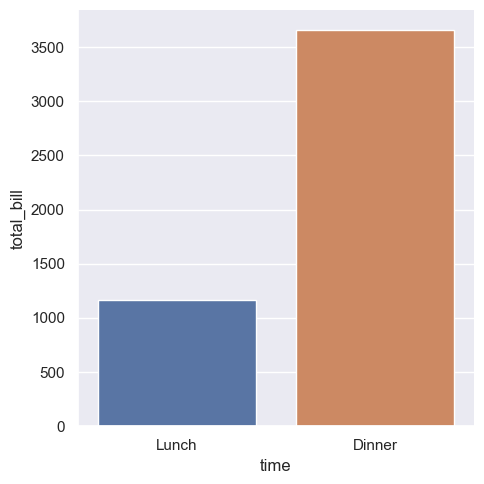

In [9]:
sns.catplot(
    data=tips,
    x='time', y='total_bill',
    hue='time',
    kind='bar',
    estimator='sum',
    errorbar=None
)

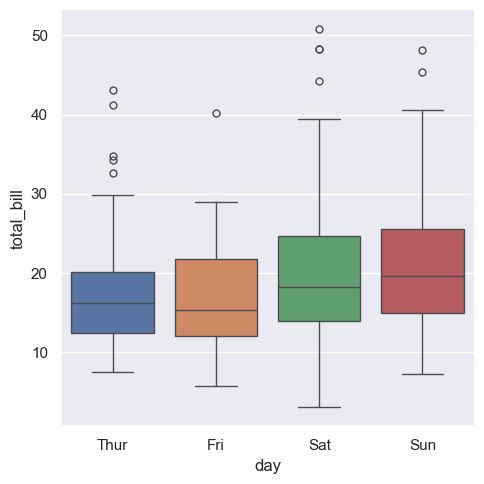

In [10]:
# catplot - boxplot

sns.catplot(
    data=tips,
    x='day', y='total_bill',
    hue='day',
    kind='box'
)

NOTE:

- A boxplot displays the distribution of a dataset based on a five-number summary: minimum, first quartile (Q1, 25%), median, third quartile (Q3, 75%), and maximum.
- Boxplots show outliers if they exist (like the small circles above the individual boxes above).
- Boxplots are designed to provide a visual representation of the `spread and skewness of the data`, not to compute aggregate functions like `sum`, `mean`, etc. Therefore, assigning `estimator=None` is not necessary and won't have any effect.